In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importing data

In [2]:
df = pd.read_csv("covtype.data")
df.head(5)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [3]:
df.rename(
    columns={
        "2596": "Elevation",
        "51": "Aspect",
        "3": "Slope",
        "258": "Horizontal_Distance_To_Hydrology",
        "0": "Vertical_Distance_To_Hydrology",
        "510": "Horizontal_Distance_To_Roadways",
        "221": "Hillshade_9am",
        "232": "Hillshade_Noon",
        "148": "Hillshade_3pm",
        "6279": "Horizontal_Distance_To_Fire_Points",
        "5": "Cover_Type"
    },
    inplace=True
)
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


# Observation

## Correlation matrix

<AxesSubplot:>

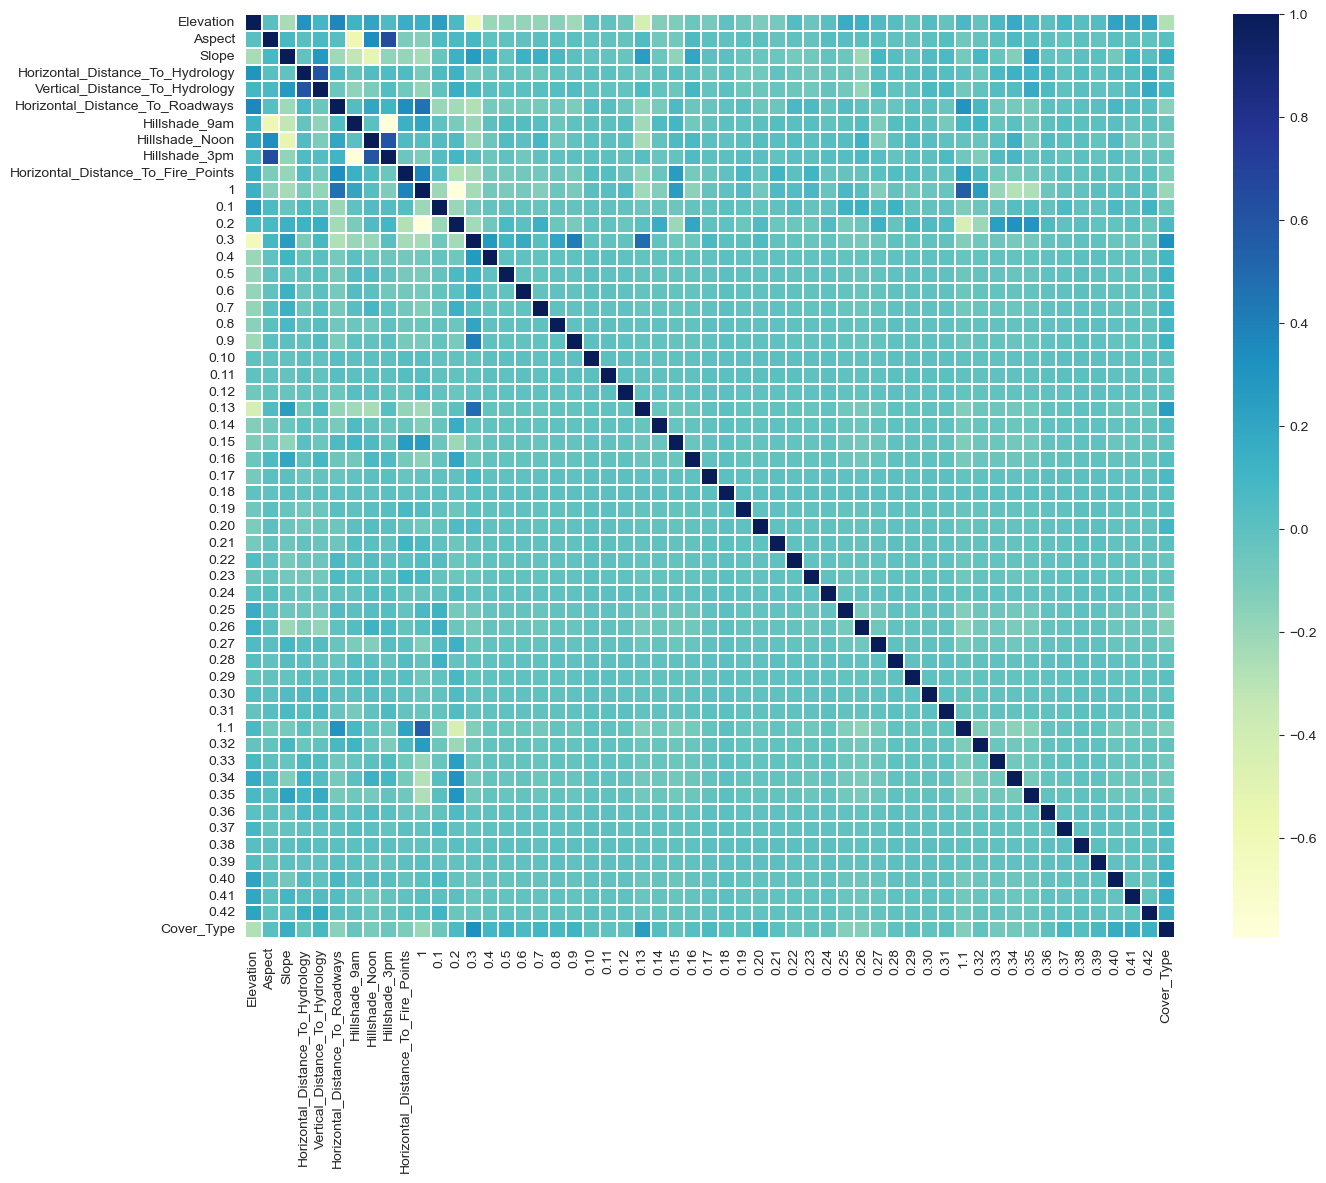

In [4]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), ax=ax, cmap="YlGnBu", linewidths=0.1)

## Balance

<AxesSubplot:ylabel='Cover_Type'>

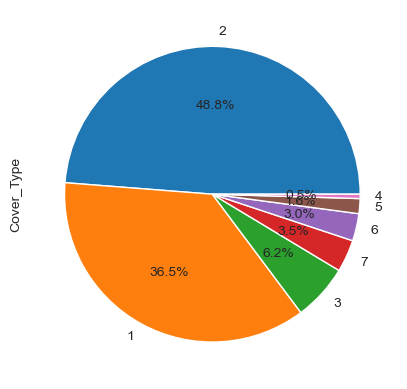

In [5]:
df["Cover_Type"].value_counts().plot.pie(autopct='%1.1f%%')

# Train

## Split bc data is massive

In [6]:
df = df.sample(frac=0.01)

In [7]:
X = df.iloc[:, 0:-1]
y = df["Cover_Type"]

## Oversample

2    2839
3    2839
1    2839
7    2839
5    2839
6    2839
4    2839
Name: Cover_Type, dtype: int64

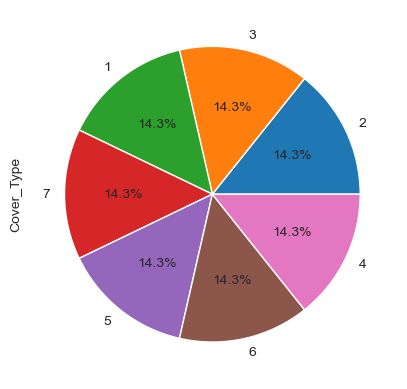

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
y.value_counts().plot.pie(autopct='%1.1f%%')
y.value_counts()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Number of train dataset: ", X_train.shape)
print("Number of test dataset: ", y_test.shape)

Number of train dataset:  (14904, 54)
Number of test dataset:  (4969,)


# Scaling

## STD

In [10]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_test_X = normalizer.transform(X_test)

## MIN MAX

In [34]:
from sklearn.preprocessing import MaxAbsScaler

mab = MaxAbsScaler()
max_scl_train_X = mab.fit_transform(X_train)
max_scl_test_X = mab.transform(X_test)

# Models

## Logistic Regression

### Default

In [11]:
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

              precision    recall  f1-score   support

           1       0.55      0.51      0.53       677
           2       0.53      0.45      0.49       733
           3       0.61      0.57      0.59       699
           4       0.87      0.93      0.90       726
           5       0.65      0.75      0.70       701
           6       0.55      0.53      0.54       715
           7       0.79      0.88      0.83       718

    accuracy                           0.66      4969
   macro avg       0.65      0.66      0.65      4969
weighted avg       0.65      0.66      0.66      4969

[1 2 3 4 5 6 7]


/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Normalized

### STD

In [12]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)

print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

              precision    recall  f1-score   support

           1       0.67      0.63      0.65       677
           2       0.70      0.72      0.71       733
           3       0.66      0.63      0.65       699
           4       0.92      0.98      0.95       726
           5       0.85      0.85      0.85       701
           6       0.65      0.63      0.64       715
           7       0.90      0.91      0.90       718

    accuracy                           0.77      4969
   macro avg       0.76      0.77      0.76      4969
weighted avg       0.76      0.77      0.77      4969

[1 2 3 4 5 6 7]


### Min max

In [29]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(max_scl_train_X, y_train)
y_pred = model.predict(max_scl_test_X)

print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

              precision    recall  f1-score   support

           1       0.63      0.53      0.58       677
           2       0.68      0.70      0.69       733
           3       0.64      0.57      0.60       699
           4       0.88      0.98      0.92       726
           5       0.73      0.78      0.75       701
           6       0.62      0.62      0.62       715
           7       0.87      0.91      0.89       718

    accuracy                           0.73      4969
   macro avg       0.72      0.73      0.72      4969
weighted avg       0.72      0.73      0.72      4969

[1 2 3 4 5 6 7]


## V-TUNE

### STD

In [13]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(lr, param_grid, cv=5)

logreg_cv.fit(normalized_train_X, y_train)

print("Best score is {}".format(logreg_cv.best_score_))

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Best score is 0.7714705438695633


### MIN MAX

In [30]:
lr = LogisticRegression(max_iter=1000)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(lr, param_grid, cv=5)

logreg_cv.fit(max_scl_train_X, y_train)

print("Best score is {}".format(logreg_cv.best_score_))

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Best score is 0.7718061143393617


/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion matrix

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

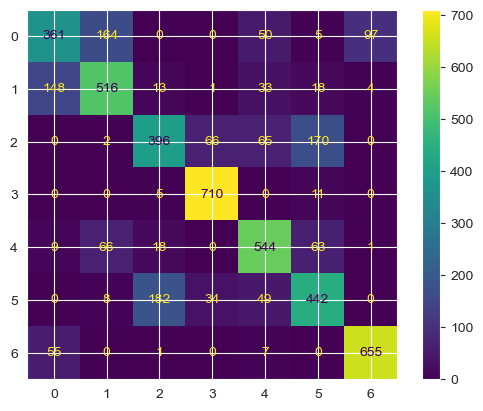

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

# Random Forrest

## Standart

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

model = rf.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.81      0.82       677
           2       0.85      0.78      0.81       733
           3       0.97      0.95      0.96       699
           4       0.99      1.00      1.00       726
           5       0.97      1.00      0.99       701
           6       0.95      0.99      0.97       715
           7       0.97      1.00      0.98       718

    accuracy                           0.93      4969
   macro avg       0.93      0.93      0.93      4969
weighted avg       0.93      0.93      0.93      4969



## MixMax

In [35]:
rf = RandomForestClassifier(n_estimators=100)

model = rf.fit(max_scl_train_X, y_train)
y_pred = model.predict(max_scl_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81       677
           2       0.84      0.79      0.82       733
           3       0.97      0.97      0.97       699
           4       0.99      1.00      1.00       726
           5       0.98      1.00      0.99       701
           6       0.96      0.98      0.97       715
           7       0.98      1.00      0.99       718

    accuracy                           0.93      4969
   macro avg       0.93      0.93      0.93      4969
weighted avg       0.93      0.93      0.93      4969



### V-TUNE

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 120, 140],
    'random_state': [0],
}

rf_cv = GridSearchCV(rf, params, cv=5)

rf_cv.fit(normalized_train_X, y_train)

print("Best score is {}".format(rf_cv.best_score_))

Best score is 0.9318972057932904


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

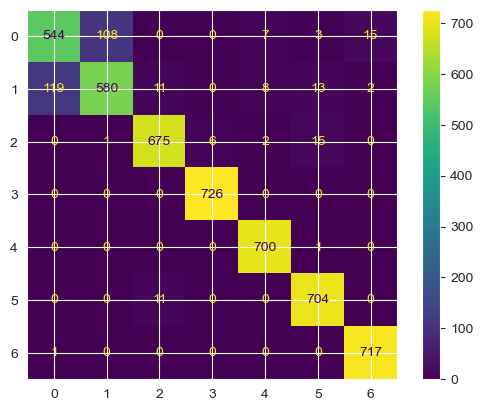

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

# Decision tree

## Standard

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

model = clf.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74       677
           2       0.77      0.74      0.75       733
           3       0.90      0.93      0.91       699
           4       1.00      0.99      1.00       726
           5       0.94      0.98      0.96       701
           6       0.94      0.92      0.93       715
           7       0.96      0.96      0.96       718

    accuracy                           0.89      4969
   macro avg       0.89      0.89      0.89      4969
weighted avg       0.89      0.89      0.89      4969



## Min max

In [37]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

model = clf.fit(max_scl_train_X, y_train)
y_pred = model.predict(max_scl_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.74      0.75       677
           2       0.77      0.75      0.76       733
           3       0.90      0.91      0.91       699
           4       0.99      0.99      0.99       726
           5       0.94      0.97      0.96       701
           6       0.94      0.92      0.93       715
           7       0.96      0.96      0.96       718

    accuracy                           0.89      4969
   macro avg       0.89      0.89      0.89      4969
weighted avg       0.89      0.89      0.89      4969



ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

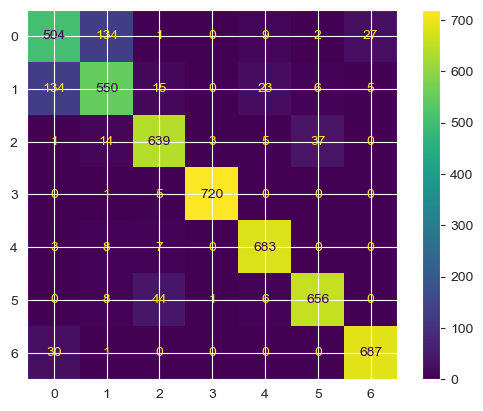

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

# K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier().fit(X_train, y_train)

model = knc.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.61      0.65       677
           2       0.74      0.69      0.72       733
           3       0.94      0.88      0.90       699
           4       0.97      1.00      0.98       726
           5       0.92      0.99      0.95       701
           6       0.89      0.95      0.92       715
           7       0.92      0.99      0.95       718

    accuracy                           0.87      4969
   macro avg       0.87      0.87      0.87      4969
weighted avg       0.87      0.87      0.87      4969



In [40]:
knc = KNeighborsClassifier().fit(X_train, y_train)

model = knc.fit(max_scl_train_X, y_train)
y_pred = model.predict(max_scl_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.60      0.63       677
           2       0.72      0.67      0.70       733
           3       0.93      0.87      0.90       699
           4       0.96      1.00      0.98       726
           5       0.90      0.98      0.94       701
           6       0.90      0.94      0.92       715
           7       0.91      0.97      0.94       718

    accuracy                           0.86      4969
   macro avg       0.86      0.86      0.86      4969
weighted avg       0.86      0.86      0.86      4969



ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

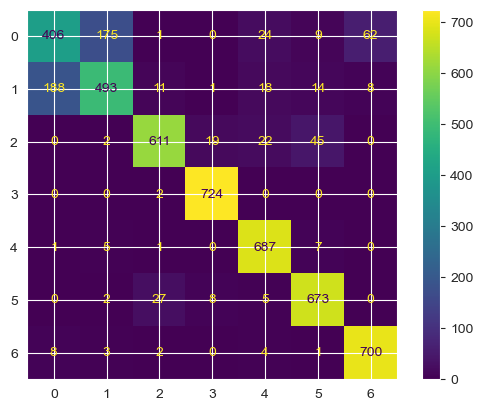

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

# Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

model = gnb.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.16      0.25       677
           2       0.85      0.12      0.21       733
           3       0.26      0.50      0.35       699
           4       0.55      1.00      0.71       726
           5       0.44      0.43      0.43       701
           6       0.43      0.04      0.07       715
           7       0.50      0.90      0.64       718

    accuracy                           0.45      4969
   macro avg       0.52      0.45      0.38      4969
weighted avg       0.52      0.45      0.38      4969



In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

model = gnb.fit(max_scl_train_X, y_train)
y_pred = model.predict(max_scl_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.16      0.26       677
           2       0.85      0.12      0.21       733
           3       0.27      0.50      0.35       699
           4       0.55      1.00      0.71       726
           5       0.45      0.43      0.44       701
           6       0.31      0.04      0.07       715
           7       0.51      0.91      0.65       718

    accuracy                           0.45      4969
   macro avg       0.51      0.45      0.38      4969
weighted avg       0.51      0.45      0.38      4969



ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (2).

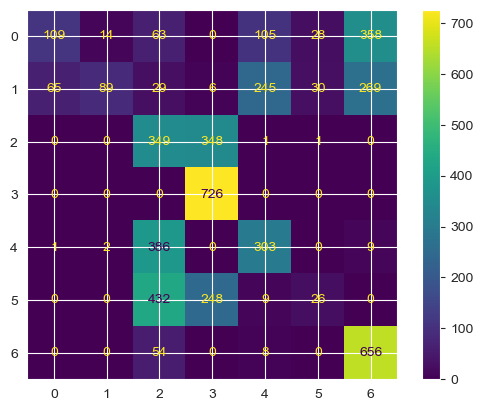

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()